# 원자재 가격 프로젝트

목표 
- investing.com에 있는 천연 가스의 가격 데이터를 수출해서 테이블 만들기 
- 'FinanceDataReader' 금융 데이터 수집 라이브러리로 원하는 원자재 가격 가져오기
- 한국거래소 상장종목 전체 가져와서 csv으로 저장 

# investing.com에 존재하는 데이터 크롤링(수출)하기 

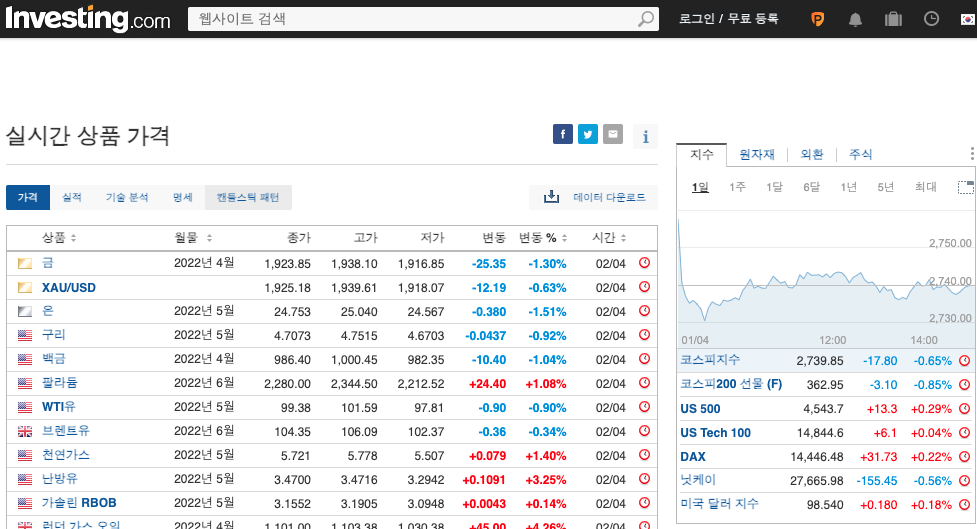

In [6]:
import pandas as pd 
import requests 
from bs4 import BeautifulSoup 
import re 
import pandas as sns 
import matplotlib.pyplot as plt 

In [ ]:
#request.get()으로 url 정보 요청하기 

headers = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36"}
url = "https://kr.investing.com/commodities/natural-gas-historical-data"

r = requests.get(url,headers=headers)
 
soup = BeautifulSoup(r.text,'lxml')


In [ ]:
# investing.com 천연 가스 정보 수출하기 
date = []
closing_price = []
open = []
high = []
low = []
trading = []
change = []


dt = soup.select("#curr_table > tbody > tr > td.first.left.bold.noWrap") #날짜
for i in dt:
  i = i.get_text().strip()
  date.append(i)

cp = soup.select("#curr_table > tbody > tr > td:nth-of-type(2)") #종가
for m in cp:
  m = m.get_text().strip()
  closing_price.append(m)

op = soup.select("#curr_table > tbody > tr > td:nth-of-type(3)") #오픈 
for d in op:
  d = d.get_text().strip()
  open.append(d)

hg = soup.select("#curr_table > tbody > tr > td:nth-of-type(4)")# 고가
for h in hg:
  h = h.get_text().strip()
  high.append(h)

lw= soup.select("#curr_table > tbody > tr > td:nth-of-type(5)")#저가 
for l in lw:
  l = l.get_text().strip()
  low.append(l)

td= soup.select("#curr_table > tbody > tr > td:nth-of-type(6)")#거래량
for t in td:
  t = t.get_text().strip()
  trading.append(t)

cg= soup.select("#curr_table > tbody > tr > td:nth-of-type(7)")#변동 
for c in cg:
  c = c.get_text().strip()
  change.append(c)


In [ ]:
#데이터프레임으로 정보 정리하기 

df = pd.DataFrame ({
    "날짜": date,
    "종가": closing_price,
    "오픈": open,
    "고가": high,
    "저가": low,
    "거래량": trading,
    "변동": change,
})

#테이블 보기 
df.tail(5)

,날짜,종가,오픈,고가,저가,거래량,변동
17,2022년 03월 09일,4.526,4.569,4.625,4.450,95.13K,-0.02%
18,2022년 03월 08일,4.527,4.818,4.882,4.507,159.17K,-6.33%
19,2022년 03월 07일,4.833,5.041,5.184,4.781,130.86K,-3.65%
20,2022년 03월 04일,5.016,4.750,5.045,4.728,125.39K,6.23%
21,2022년 03월 03일,4.722,4.795,4.936,4.628,137.15K,-0.84%


# 금용 데이터를 더 쉽게 수집하는 방법 뭐가 있을까?🧐

"FinanceDataReader" 금용 데이터 수집 라이브러리를 사용하여 한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격 및 종목 리스팅을 가져올 수 있다. 🌞

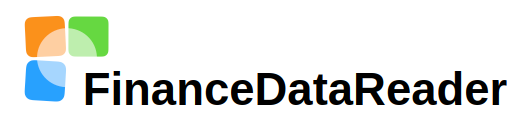

In [ ]:
#Finance Data Reader 다운로드 실행하기 
! pip install finance-datareader

In [12]:
import FinanceDataReader as fdr

# '천연가스' 2022년 1월 3일부터 4월 1일간의 가격 가져오기 
df = fdr.DataReader('NG','2022-01-03','2022-04-01')
df.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-01-03,3.815,3.702,3.858,3.638,99070.0,0.0228
2022-01-04,3.717,3.817,3.944,3.709,133390.0,-0.0257
2022-01-05,3.882,3.747,3.897,3.717,96810.0,0.0444
2022-01-06,3.812,3.842,3.931,3.801,116580.0,-0.0180
2022-01-07,3.916,3.860,3.980,3.800,127010.0,0.0273


In [ ]:
# 2022년 1월 3일부터 4월 1일 간의 천연가스 캔들차트 
fdr.chart.plot(df)

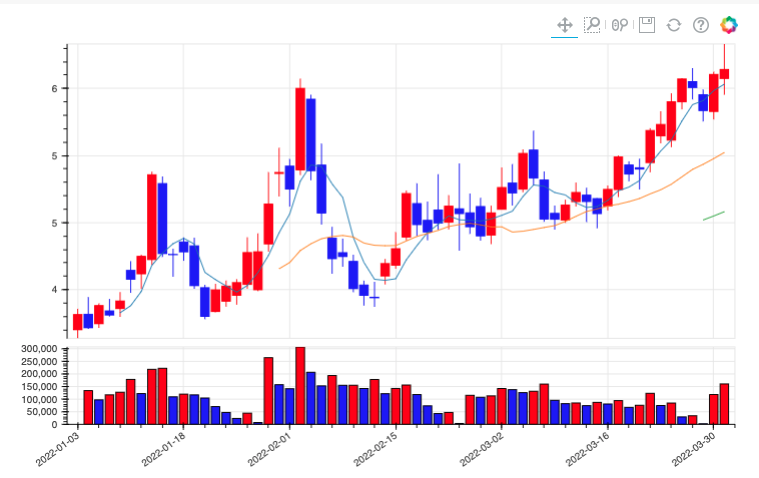

# 플로틀리 (Plotly)를 사용하여 실시간으로 볼 수 있는 자동화 캔들차트를 만들어 보자 

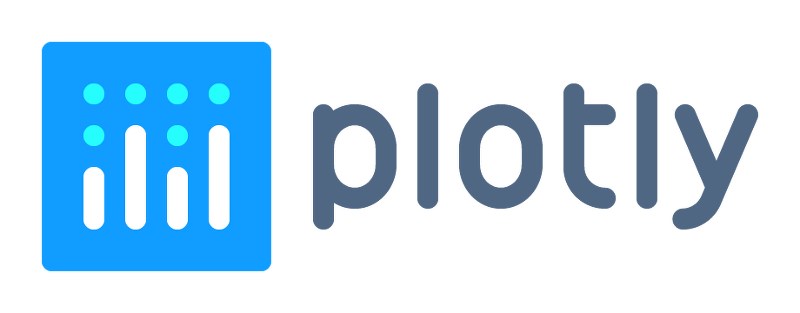

In [ ]:
import plotly.graph_objects as go 


#자동 천연가스 캔들차트 만들기 

graph = {
    'x' : df.index, 
    'open' : df.Open,
    'close' : df.Close,
    'high' : df.High, 
    'low' : df.Low, 
    'type': 'candlestick', 
    'name' : 'NG',
    'showlegend': True
}

layout = go.Figure (
    data = [graph],
    layout_title = 'NG'
)

layout

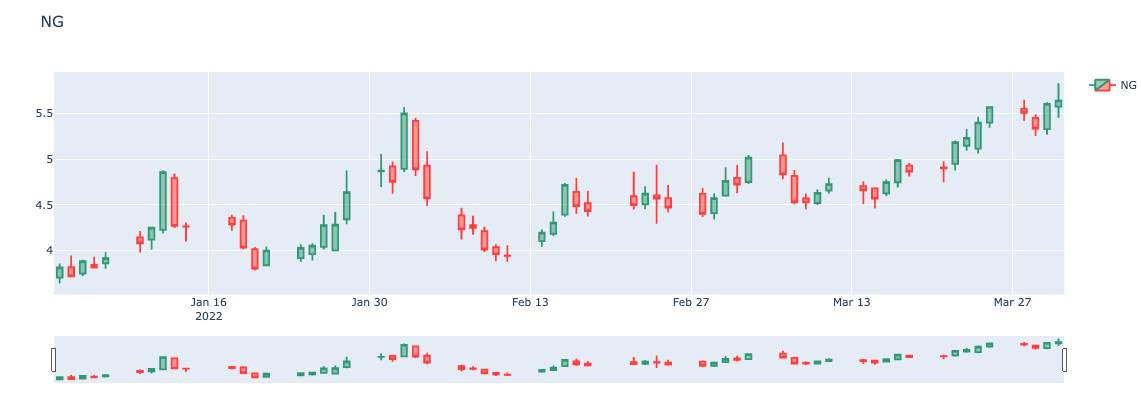

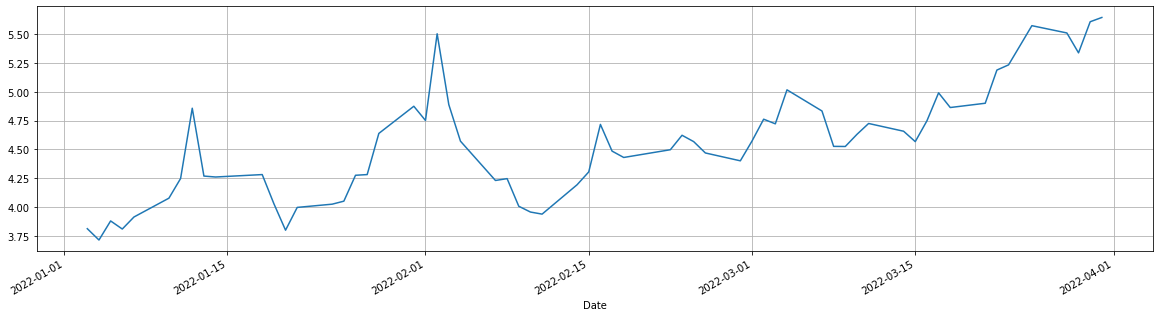

In [ ]:
# 천년가스, 2018년~현재간의 시계열 차트 
df['Close'].plot(figsize = (20,5), grid = True)

In [ ]:
# 애플 (AAPL) 2022년 1월 3일부터 4월 1일간의 가격 가져오기 

mf = fdr.DataReader('AAPL','2022')
mf.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-01-03,182.01,177.83,182.88,177.71,96490000.0,0.0250
2022-01-04,179.70,182.63,182.94,179.12,92660000.0,-0.0127
2022-01-05,174.92,179.61,180.17,174.64,93490000.0,-0.0266
2022-01-06,172.00,172.70,175.30,171.64,95420000.0,-0.0167
2022-01-07,172.17,172.89,174.14,171.03,86710000.0,0.0010


In [ ]:
#애플 캔들스틱 (1/3 ~ 4/1)
fdr.chart.plot(mf, title = "애플(AAPL)")

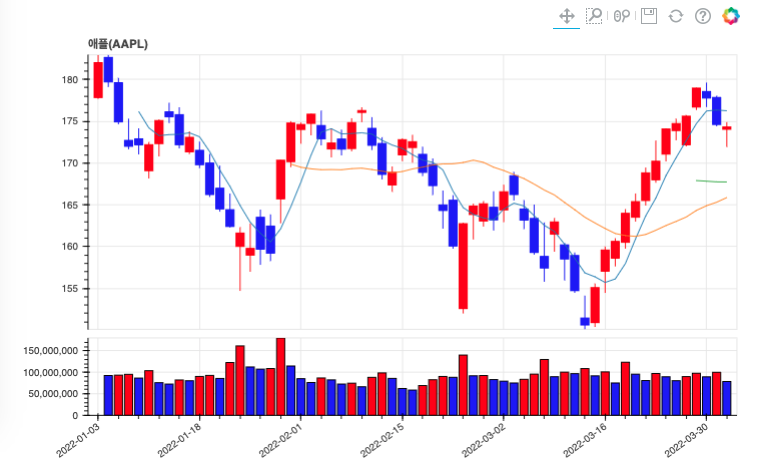

In [ ]:
# 카카오 (035720) 2022년 가격 가져오기
ka = fdr.DataReader('035720','2022')
ka.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,113500,117000,113000,114500,1846049,0.017778
2022-01-04,114000,114500,111000,111500,2396207,-0.026201
2022-01-05,111000,111000,105000,105500,5108428,-0.053812
2022-01-06,102500,103000,99900,100000,7120428,-0.052133
2022-01-07,100000,101500,99800,100000,3962672,0.000000


In [ ]:
# 캔들차트 설정하기 
fdr.chart.config( title ="카카오")
fdr.chart.config(width=600, height = 300)
fdr.chart.config (volume = False)

fdr.chart.plot(ka)

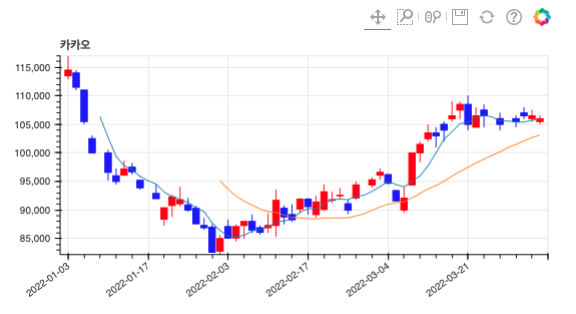

In [ ]:
#런던가스 주요 가져오기 
lo = fdr.DataReader('G','2022')

#dict으로 캔들차트 설정 
config = {'title':'런던 가스 오일 선물 가격 ', 
          'width': 600, 
          'height': 300,
          'volume': True,
}

fdr.chart.config(config=config)

fdr.chart.plot(lo)

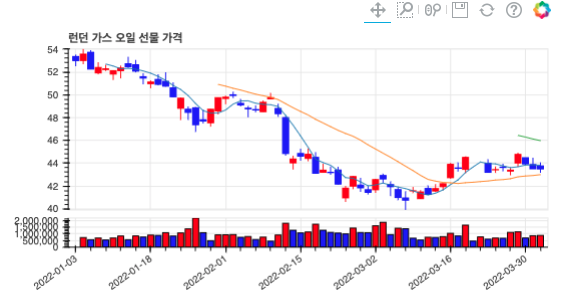

In [ ]:
# 모든 설정을 초기 기본 설정으로 되돌리기 
fdr.chart.config(reset=True)

In [14]:
sa = fdr.DataReader("005930","2022")
fdr.chart.plot(sa, title = "삼성 전자(005930")


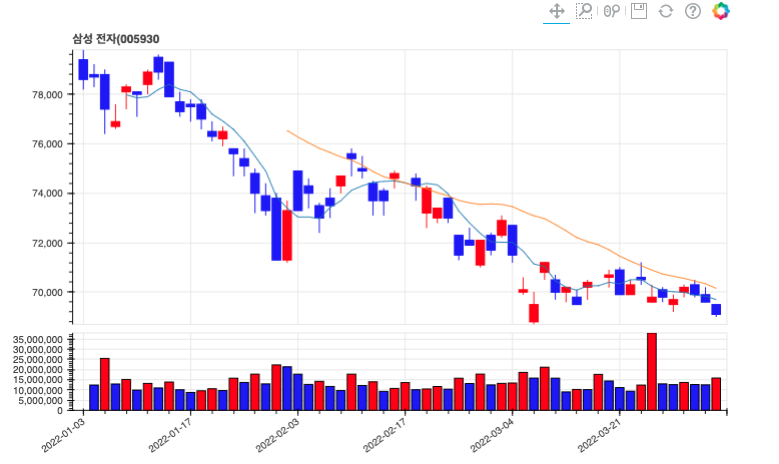

In [ ]:
# 자동화 캔들차트 만들기 
graph = {
    'x' : sa.index, 
    'open' : sa.Open,
    'close' : sa.Close,
    'high' : sa.High, 
    'low' : sa.Low, 
    'type': 'candlestick', 
    'name' : '삼성 전자',
    'showlegend': True
}

layout = go.Figure (
    data = [graph],
    layout_title = '삼성 전자'
)

layout

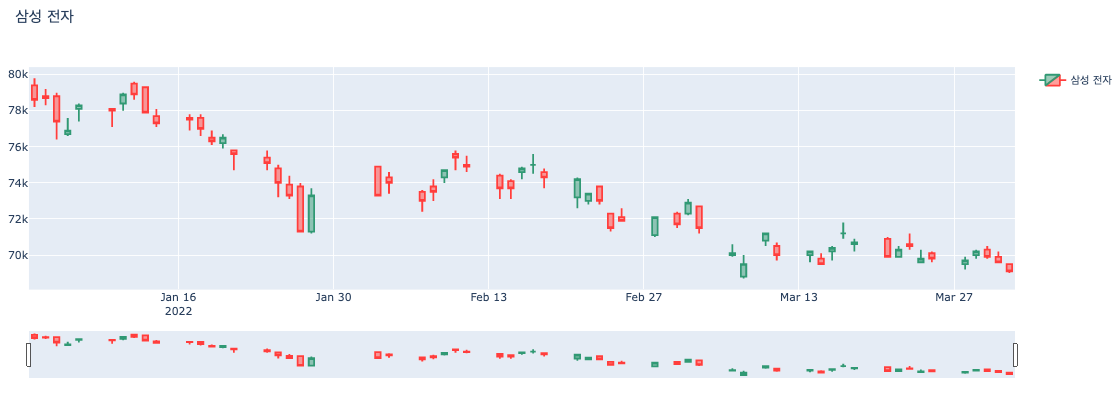

# 만약 상장종목 리스트를 가져오고 싶으면 어떻게 하면 좋을까?🧐

정담 : "FinanceDataReader"의 StockListing에 거래소 이름을 적어주면 된다. 

In [ ]:
#한국거래소 상장종목 전체 가져오기 

df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [ ]:
# 정보들을 csv으로 저장 
df_krx.to_csv("한국거래소_상장종목.csv", mode = "w", encoding = 'euc-kr')
print("save")

save


저장된 파일을 볼 수 있다.

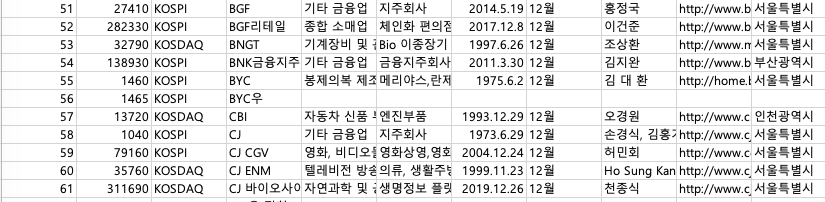